In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn
import numpy as np

In [105]:
data = pd.read_excel('/Users/user/Desktop/wybory-dane-0,7komisji.xlsx')
data.head()

,t,PIS,PO,3D,Lewica,Konfa
0,1,0.415,0.255,0.138,0.080,0.075
1,2,0.405,0.261,0.139,0.080,0.075
2,3,0.402,0.263,0.140,0.081,0.074
3,4,0.399,0.265,0.141,0.081,0.074
4,5,0.398,0.266,0.142,0.081,0.074


In [106]:
data.columns

Index(['t', 'PIS', 'PO', '3D', 'Lewica', 'Konfa'], dtype='object')

In [107]:
df_t = data[['t']]
df_pis = data[['PIS']]
df_po = data[['PO']]
df_3d = data[['3D']]
df_lew = data[['Lewica']]
df_kon = data[['Konfa']]

print(df_pis.head())
print(df_po.head())

     PIS
0  0.415
1  0.405
2  0.402
3  0.399
4  0.398
      PO
0  0.255
1  0.261
2  0.263
3  0.265
4  0.266


In [108]:
model_pis = LinearRegression()
model_pis.fit(df_t, df_pis)
model_po = LinearRegression()
model_po.fit(df_t, df_po)
model_3d = LinearRegression()
model_3d.fit(df_t, df_3d)
model_lew = LinearRegression()
model_lew.fit(df_t, df_lew)
model_kon = LinearRegression()
model_kon.fit(df_t, df_kon)

LinearRegression()

In [109]:
new_time = pd.DataFrame({'t': np.arange(1, 19)})

In [110]:
frequency = [f"{int(p * 100)}%" for p in np.arange(0.1, 1.01, 0.05)]
percentages = [f"{int(p * 100)}%" for p in np.arange(0.00, 0.45, 0.05)]
percentages

['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']

In [111]:
pred_pis = model_pis.predict(new_time)
pred_po = model_po.predict(new_time)
pred_3d = model_3d.predict(new_time)
pred_lew = model_lew.predict(new_time)
pred_kon = model_kon.predict(new_time)

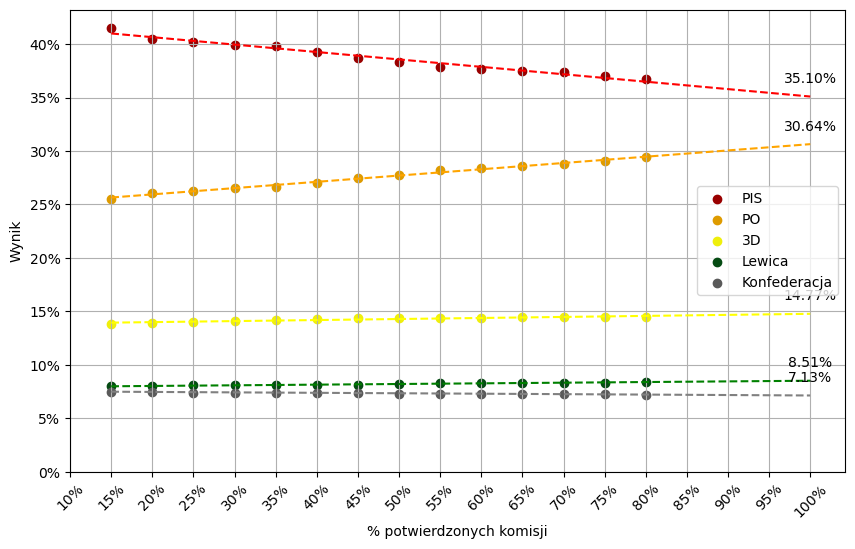

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df_t, df_pis, label='PIS', color='#990000')
plt.scatter(df_t, df_po, label='PO', color='#DE9B00')
plt.scatter(df_t, df_3d, label='3D', color='#EFEF0B')
plt.scatter(df_t, df_lew, label='Lewica', color='#054B13')
plt.scatter(df_t, df_kon, label='Konfederacja', color='#5A5A5A')
plt.plot(new_time, pred_pis, linestyle='--', color='red')
plt.plot(new_time, pred_po, linestyle='--', color='orange')
plt.plot(new_time, pred_3d, linestyle='--', color='yellow')
plt.plot(new_time, pred_lew, linestyle='--', color='green')
plt.plot(new_time, pred_kon, linestyle='--', color='grey')

for i, result in enumerate([pred_pis[-1][0], pred_po[-1][0], pred_3d[-1][0], pred_lew[-1][0], pred_kon[-1][0]]):
    plt.annotate(f'{result*100:.2f}%', (18, result), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(np.arange(len(frequency)), frequency, rotation=45)
plt.yticks(np.arange(0.00, 0.41, 0.05), percentages)

plt.xlabel('% potwierdzonych komisji')
plt.ylabel('Wynik')
plt.legend()
plt.grid()
plt.show()